In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


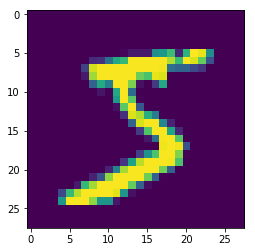

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [59]:
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten, Add

model = Sequential() 
#Receptive field becomes: 3X3
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26X26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu'))#24X24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) #22X22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))#11X11


model.add(Convolution2D(16, 3, 3, activation='relu')) #9X9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu'))#9X9
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Convolution2D(10, 3, 3, activation='relu'))#7X7
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu'))#5X5




model.add(Convolution2D(10,5))


model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_129 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_111 (Bat (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_36 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_112 (Bat (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_37 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 22, 22, 16)        2320      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [61]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=50, validation_data=(X_test, Y_test), verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 20s 332us/step - loss: 0.3100 - acc: 0.9009 - val_loss: 0.0777 - val_acc: 0.9731
Epoch 2/50
60000/60000 [==============================] - 12s 201us/step - loss: 0.0815 - acc: 0.9749 - val_loss: 0.0556 - val_acc: 0.9834
Epoch 3/50
60000/60000 [==============================] - 12s 205us/step - loss: 0.0622 - acc: 0.9802 - val_loss: 0.0567 - val_acc: 0.9830
Epoch 4/50
60000/60000 [==============================] - 12s 205us/step - loss: 0.0554 - acc: 0.9827 - val_loss: 0.0333 - val_acc: 0.9903
Epoch 5/50
60000/60000 [==============================] - 12s 203us/step - loss: 0.0487 - acc: 0.9850 - val_loss: 0.0339 - val_acc: 0.9899
Epoch 6/50
60000/60000 [==============================] - 12s 201us/step - loss: 0.0447 - acc: 0.9854 - val_loss: 0.0316 - val_acc: 0.9905
Epoch 7/50
60000/60000 [==============================] - 12s 201us/step - loss: 0.0430 - acc: 0.9865 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [63]:
print(score)

[0.024168128230666844, 0.9935]
